In [1]:
import plio.io.io_spectral_profiler
from libpysat.examples import get_path
import pandas as pd

from libpysat.spectral.spectra import *
from libpysat.utils.utils import *

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/arsanders/miniconda3/envs/pysat/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['generic', 'rand']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
figsize(20,10)

# Open a spectral profiler and load it into a Spectra object

In [3]:
s = Spectra.from_spectral_profiler(('/usgs/shareall/arsanders/PySAT/libpysat/examples/SpectralProfiler/SP_2C_02_02358_S138_E3586.spc'))
s.head(10)

,,512.6,518.4,524.7,530.4,536.5,542.8000000000001,548.7,554.5,560.5,566.7,...,CALIBRATION,SP_PELTIER,TC_MI_STATUS,CLOCK_COUNT_ERR_FLAG,SPATIAL_RESOLUTION_FLAG,GEOMETRIC_INFO_RECAL_FLAG,SUPPORT_IMAGE_LINE_POSITION,SUPPORT_IMAGE_COLUMN_POSITION,THUMBNAIL_LINE_POSITION,THUMBNAIL_COLUMN_POSITION
minor,id,,,,,,,,,,,,,,,,,,,,,
RAW,0,5123.0000,5887.0000,6375.0000,6806.0000,7494.0000,7585.0000,7525.0000,7860.0000,8582.0000,9196.0000,...,0,1,1,0,65,67,27,480,13,228
REF1,0,0.0402,0.0487,0.0497,0.0520,0.0532,0.0551,0.0559,0.0571,0.0594,0.0612,...,0,1,1,0,65,67,27,480,13,228
REF2,0,0.0397,0.0482,0.0492,0.0515,0.0527,0.0545,0.0553,0.0565,0.0588,0.0605,...,0,1,1,0,65,67,27,480,13,228
QA,0,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,...,0,1,1,0,65,67,27,480,13,228
RAW,1,5164.0000,5955.0000,6461.0000,6905.0000,7614.0000,7709.0000,7642.0000,7986.0000,8730.0000,9366.0000,...,0,1,1,0,65,67,55,480,27,228
REF1,1,0.0414,0.0502,0.0513,0.0537,0.0549,0.0568,0.0576,0.0588,0.0612,0.0631,...,0,1,1,0,65,67,55,480,27,228
REF2,1,0.0409,0.0497,0.0507,0.0531,0.0544,0.0562,0.0570,0.0582,0.0606,0.0624,...,0,1,1,0,65,67,55,480,27,228
QA,1,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,...,0,1,1,0,65,67,55,480,27,228
RAW,2,5080.0000,5820.0000,6296.0000,6711.0000,7375.0000,7473.0000,7416.0000,7741.0000,8445.0000,9038.0000,...,0,1,1,0,65,67,83,480,40,228


# View the metadata

In [4]:
# View the metadata.  Usage: <spectra object>.loc(<row filter>, s.metadata)
s.meta.head()

,,CALIBRATION,CENTER_LATITUDE,CENTER_LONGITUDE,CLOCK_COUNT_ERR_FLAG,DPU_TEMPERATURE,EMISSION_ANGLE,GEOMETRIC_INFO_RECAL_FLAG,HALOGEN_BULB_RADIANCE,HALOGEN_BULB_TEMPERATURE1,HALOGEN_BULB_TEMPERATURE2,...,SP_POWER_P5V,SP_TEMPERATURE,SUB_SPACECRAFT_LATITUDE,SUB_SPACECRAFT_LONGITUDE,SUPPORT_IMAGE_COLUMN_POSITION,SUPPORT_IMAGE_LINE_POSITION,TC_MI_STATUS,THUMBNAIL_COLUMN_POSITION,THUMBNAIL_LINE_POSITION,VIS_FOCAL_PLANE_TEMPERATURE
minor,id,,,,,,,,,,,,,,,,,,,,,
RAW,0,0,-13.488591,358.607848,0,14.2704,0.607720,67,4.759,10.36,10.36,...,4.9735,20.808901,-13.517322,358.600799,480,27,1,228,13,21.059999
REF1,0,0,-13.488591,358.607848,0,14.2704,0.607720,67,4.759,10.36,10.36,...,4.9735,20.808901,-13.517322,358.600799,480,27,1,228,13,21.059999
REF2,0,0,-13.488591,358.607848,0,14.2704,0.607720,67,4.759,10.36,10.36,...,4.9735,20.808901,-13.517322,358.600799,480,27,1,228,13,21.059999
QA,0,0,-13.488591,358.607848,0,14.2704,0.607720,67,4.759,10.36,10.36,...,4.9735,20.808901,-13.517322,358.600799,480,27,1,228,13,21.059999
RAW,1,0,-13.507382,358.607661,0,14.2704,0.607456,67,4.759,10.36,10.36,...,4.9735,20.808901,-13.536101,358.600617,480,55,1,228,27,21.059999


In [5]:
s.spectra.head()

,major,512.6,518.4,524.7,530.4,536.5,542.8000000000001,548.7,554.5,560.5,566.7,...,2516.1000000000004,2524.1000000000004,2532.1000000000004,2540.0,2548.0,2556.0,2564.0,2572.0,2579.9,2587.9
minor,id,,,,,,,,,,,,,,,,,,,,,
RAW,0,5123.0000,5887.0000,6375.0000,6806.0000,7494.0000,7585.0000,7525.0000,7860.0000,8582.0000,9196.0000,...,7388.0000,11511.0000,9068.0000,10917.0,8617.0000,6806.0,11534.0,7317.0,11412.0000,6100.0
REF1,0,0.0402,0.0487,0.0497,0.0520,0.0532,0.0551,0.0559,0.0571,0.0594,0.0612,...,0.0854,0.1308,0.0472,0.0,0.0222,0.0,0.0,0.0,0.0213,0.0
REF2,0,0.0397,0.0482,0.0492,0.0515,0.0527,0.0545,0.0553,0.0565,0.0588,0.0605,...,0.0850,0.1302,0.0470,0.0,0.0221,0.0,0.0,0.0,0.0212,0.0
QA,0,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,...,288.0000,288.0000,288.0000,296.0,288.0000,296.0,296.0,296.0,288.0000,296.0
RAW,1,5164.0000,5955.0000,6461.0000,6905.0000,7614.0000,7709.0000,7642.0000,7986.0000,8730.0000,9366.0000,...,7397.0000,11508.0000,9070.0000,10921.0,8610.0000,6815.0,11526.0,7322.0,11410.0000,6095.0


# Demonstrate "loc" style access

In [6]:
# Searches the "s" object for all rows labeled "raw"
s.loc['RAW'].head(10)

,512.6,518.4,524.7,530.4,536.5,542.8000000000001,548.7,554.5,560.5,566.7,...,CALIBRATION,SP_PELTIER,TC_MI_STATUS,CLOCK_COUNT_ERR_FLAG,SPATIAL_RESOLUTION_FLAG,GEOMETRIC_INFO_RECAL_FLAG,SUPPORT_IMAGE_LINE_POSITION,SUPPORT_IMAGE_COLUMN_POSITION,THUMBNAIL_LINE_POSITION,THUMBNAIL_COLUMN_POSITION
id,,,,,,,,,,,,,,,,,,,,,
0,5123.0,5887.0,6375.0,6806.0,7494.0,7585.0,7525.0,7860.0,8582.0,9196.0,...,0,1,1,0,65,67,27,480,13,228
1,5164.0,5955.0,6461.0,6905.0,7614.0,7709.0,7642.0,7986.0,8730.0,9366.0,...,0,1,1,0,65,67,55,480,27,228
2,5080.0,5820.0,6296.0,6711.0,7375.0,7473.0,7416.0,7741.0,8445.0,9038.0,...,0,1,1,0,65,67,83,480,40,228
3,5078.0,5810.0,6287.0,6702.0,7368.0,7458.0,7402.0,7728.0,8436.0,9025.0,...,0,1,1,0,65,67,112,480,53,228
4,5098.0,5845.0,6326.0,6747.0,7420.0,7516.0,7454.0,7785.0,8501.0,9102.0,...,0,1,1,0,65,67,140,480,66,228
5,5072.0,5804.0,6272.0,6687.0,7352.0,7438.0,7384.0,7702.0,8403.0,8985.0,...,0,1,1,0,65,67,168,480,80,228
6,5092.0,5842.0,6325.0,6741.0,7416.0,7507.0,7454.0,7777.0,8496.0,9095.0,...,0,1,1,0,65,67,196,480,93,228
7,5104.0,5853.0,6333.0,6756.0,7439.0,7524.0,7474.0,7799.0,8517.0,9126.0,...,0,1,1,0,65,67,224,480,106,228
8,5119.0,5889.0,6371.0,6806.0,7490.0,7582.0,7526.0,7857.0,8578.0,9196.0,...,0,1,1,0,65,67,252,480,120,228


In [7]:
# Searches the "s" object for observation id's 5-100 that are labeled "raw"
s.get[:, :, 540:1200].head()

,major,542.8000000000001,548.7,554.5,560.5,566.7,572.6,578.5,584.5,590.6,596.7,...,1123.8,1131.8,1139.7,1147.8,1155.7,1163.8,1171.8,1179.8,1187.8,1195.8
minor,id,,,,,,,,,,,,,,,,,,,,,
RAW,0,7585.0000,7525.0000,7860.0000,8582.0000,9196.0000,9087.0000,9163.0000,10107.0000,10840.0000,10626.0000,...,10799.0000,11182.0000,11230.0000,11348.0000,11659.0000,11859.0000,11916.0000,12438.0000,12067.0000,13587.0000
REF1,0,0.0551,0.0559,0.0571,0.0594,0.0612,0.0613,0.0627,0.0632,0.0665,0.0660,...,0.1286,0.1276,0.1282,0.1286,0.1288,0.1308,0.1304,0.1324,0.1345,0.1350
REF2,0,0.0545,0.0553,0.0565,0.0588,0.0605,0.0606,0.0620,0.0625,0.0657,0.0653,...,0.1270,0.1260,0.1268,0.1272,0.1273,0.1293,0.1290,0.1309,0.1330,0.1335
QA,0,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,...,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000
RAW,1,7709.0000,7642.0000,7986.0000,8730.0000,9366.0000,9253.0000,9328.0000,10314.0000,11059.0000,10839.0000,...,10983.0000,11360.0000,11420.0000,11547.0000,11838.0000,12057.0000,12118.0000,12656.0000,12297.0000,13829.0000


In [8]:
s.tolerance

0.5

In [9]:
s[[554, 560]].head()

,,554.5,560.5
minor,id,,
RAW,0,7860.0000,8582.0000
REF1,0,0.0571,0.0594
REF2,0,0.0565,0.0588
QA,0,288.0000,288.0000
RAW,1,7986.0000,8730.0000


# Demonstrate "iloc" style access

## Scalar

In [10]:
# Access index 42 in the spectra object
#   Note that usage does not require .to_frame().T - This code was included to 'pretty print' the row.
s.iget[5].head()

512.6    0.0414
518.4    0.0502
524.7    0.0513
530.4    0.0537
536.5    0.0549
dtype: float64

## Slice

In [11]:
# Access the 4 - 7th indices in the spectra object
s.iloc[4:7].head()

,,512.6,518.4,524.7,530.4,536.5,542.8000000000001,548.7,554.5,560.5,566.7,...,CALIBRATION,SP_PELTIER,TC_MI_STATUS,CLOCK_COUNT_ERR_FLAG,SPATIAL_RESOLUTION_FLAG,GEOMETRIC_INFO_RECAL_FLAG,SUPPORT_IMAGE_LINE_POSITION,SUPPORT_IMAGE_COLUMN_POSITION,THUMBNAIL_LINE_POSITION,THUMBNAIL_COLUMN_POSITION
minor,id,,,,,,,,,,,,,,,,,,,,,
RAW,1,5164.0000,5955.0000,6461.0000,6905.0000,7614.0000,7709.0000,7642.0000,7986.0000,8730.0000,9366.0000,...,0,1,1,0,65,67,55,480,27,228
REF1,1,0.0414,0.0502,0.0513,0.0537,0.0549,0.0568,0.0576,0.0588,0.0612,0.0631,...,0,1,1,0,65,67,55,480,27,228
REF2,1,0.0409,0.0497,0.0507,0.0531,0.0544,0.0562,0.0570,0.0582,0.0606,0.0624,...,0,1,1,0,65,67,55,480,27,228


## List

In [12]:
# Access indices 1,2,3,5,8,13 in the spectrum object
ref = s.get[['REF1', 'REF2'], :, [512, 518, 542]].sort_index(level=1)
ref.head()

,,512.6,518.4,542.8000000000001
minor,id,,,
REF1,0,0.0402,0.0487,0.0551
REF2,0,0.0397,0.0482,0.0545
REF1,1,0.0414,0.0502,0.0568
REF2,1,0.0409,0.0497,0.0562
REF1,2,0.0391,0.0474,0.0537


In [13]:
ref.get['REF1'].head()

,512.6,518.4,542.8000000000001
id,,,
0,0.0402,0.0487,0.0551
1,0.0414,0.0502,0.0568
2,0.0391,0.0474,0.0537
3,0.0393,0.0476,0.0539
4,0.0393,0.0477,0.0540


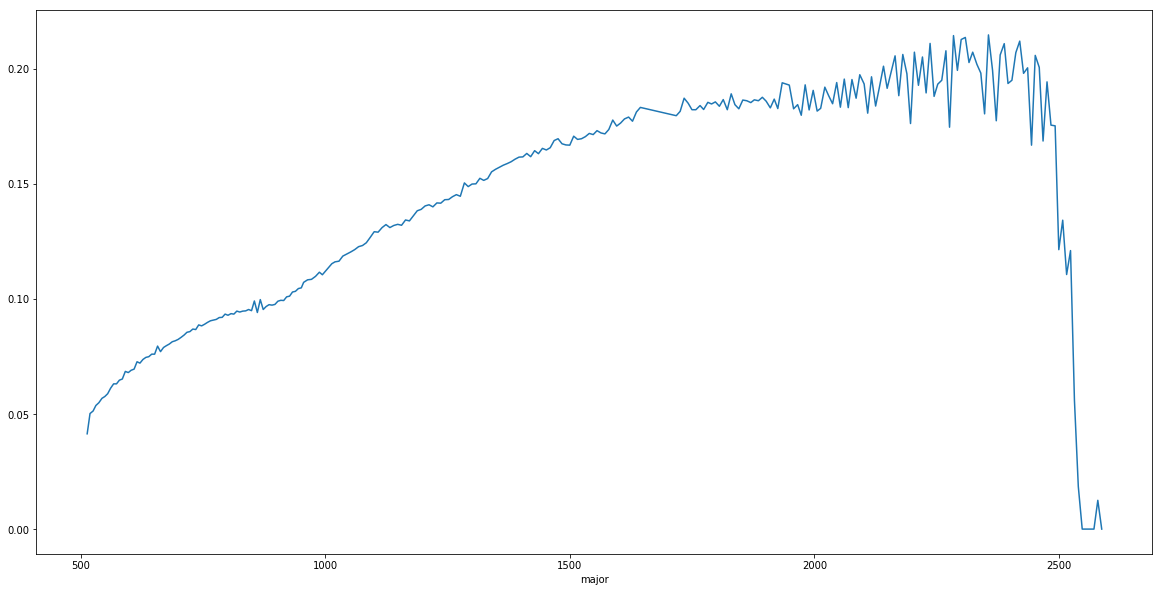

In [14]:
spectrum = s.get['REF1', 1, s.wavelengths]
spectrum.plot()

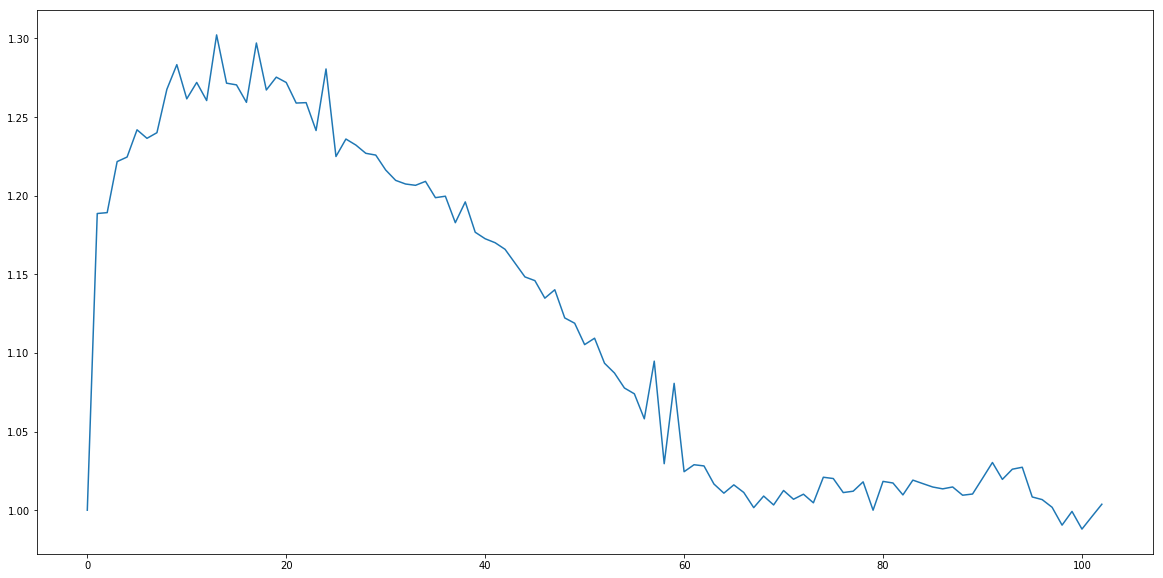

In [15]:
spectrum_corrected = spectrum.linear_correction([512.6,993.7,1195.8])
spectrum_corrected.plot()

In [16]:
# Perform linear continuum correction on a single spectrum
# may be suffering from underflow
ref = s.spectra.get['REF1', :]
ref_corrected = ref.linear_correction()
#ef_corrected.head(10)

ValueError: Shape of passed values is (38, 2), indices imply (38, 269)

In [ ]:
ref.iget[3:6].plot_spectra()

In [ ]:
ref_corrected.iget[3:6].plot_spectra()